## Basics

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hussainnasirkhan/multiple-linear-regression-dataset")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\Chirag Gupta\.cache\kagglehub\datasets\hussainnasirkhan\multiple-linear-regression-dataset\versions\1


In [16]:
import os
print(os.listdir(path))

['multiple_linear_regression_dataset.csv']


In [19]:
# Load CSV file
csv_file = os.path.join(path, "multiple_linear_regression_dataset.csv")
df = pd.read_csv(csv_file)


In [20]:
print(df.head())

   age  experience  income
0   25           1   30450
1   30           3   35670
2   47           2   31580
3   32           5   40130
4   43          10   47830


In [80]:
# Prepare and normalize data
X = df.iloc[:, :-1].values          # Independent variables
y = df.iloc[:, -1].values.reshape(-1, 1)   # Dependent variable

# Feature normalization
X = (X - X.mean(axis=0)) / X.std(axis=0)
y = (y - y.mean()) / y.std()

## Single Layer Neural Network (Relu)

In [70]:
#activation function
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

activation=relu
activation_derivative=relu_derivative


In [71]:
# MultiLayer Perceptron
class MLPRegression:
    def __init__(self, input_size, hidden_size, lr=0.01, epochs=3000):
        self.lr = lr
        self.epochs = epochs

        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, 1)
        self.b2 = np.zeros((1, 1))

        self.losses = []

    def fit(self, X, y):
        for _ in range(self.epochs):

            # Forward pass
            z1 = np.dot(X, self.W1) + self.b1
            a1 = activation(z1)
            y_pred = np.dot(a1, self.W2) + self.b2

            # Loss
            loss = np.mean((y - y_pred) ** 2)
            self.losses.append(loss)

            # Backpropagation
            d_y = -2 * (y - y_pred) / len(y)

            dW2 = np.dot(a1.T, d_y)
            db2 = np.sum(d_y, axis=0, keepdims=True)

            da1 = np.dot(d_y, self.W2.T)
            dz1 = da1 * activation_derivative(z1)

            dW1 = np.dot(X.T, dz1)
            db1 = np.sum(dz1, axis=0, keepdims=True)

            # Update
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2

    def predict(self, X):
        z1 = np.dot(X, self.W1) + self.b1
        a1 = activation(z1)
        return np.dot(a1, self.W2) + self.b2


Mean Squared Error: 0.0072129858835322915


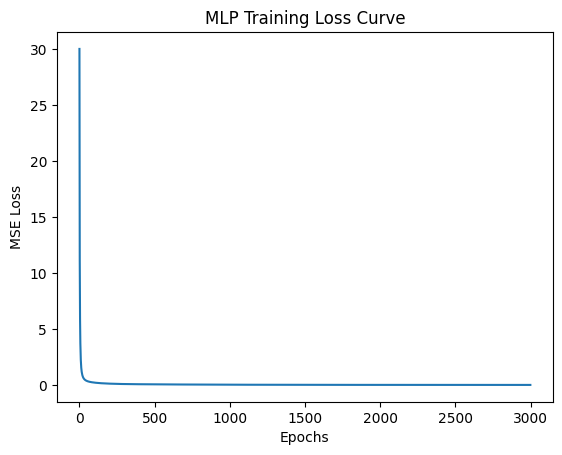

In [72]:
#Train MLP
mlp = MLPRegression(
    input_size=X.shape[1],
    hidden_size=10,
    lr=0.01,
    epochs=3000
)

mlp.fit(X, y)
#PREDICTION
y_pred = mlp.predict(X)

mse = np.mean((y - y_pred) ** 2)
print("Mean Squared Error:", mse)
#Training loss curve
plt.plot(mlp.losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("MLP Training Loss Curve")
plt.show()


## Multiple Layer Neural Network (RELU)

In [74]:
#activation function
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

activation=relu
activation_derivative=relu_derivative

In [75]:
# Multi-Layer Perceptron with 3 Hidden Layers
class MLPRegression:
    def __init__(self, input_size, hidden_sizes, lr=0.01, epochs=3000):
        self.lr = lr
        self.epochs = epochs
        
        # Initialize weights and biases for all layers
        # Architecture: input -> hidden1 -> hidden2 -> hidden3 -> output
        self.W1 = np.random.randn(input_size, hidden_sizes[0]) * 0.01
        self.b1 = np.zeros((1, hidden_sizes[0]))
        
        self.W2 = np.random.randn(hidden_sizes[0], hidden_sizes[1]) * 0.01
        self.b2 = np.zeros((1, hidden_sizes[1]))
        
        self.W3 = np.random.randn(hidden_sizes[1], hidden_sizes[2]) * 0.01
        self.b3 = np.zeros((1, hidden_sizes[2]))
        
        self.W4 = np.random.randn(hidden_sizes[2], 1) * 0.01
        self.b4 = np.zeros((1, 1))
        
        self.losses = []

    def fit(self, X, y):
        for epoch in range(self.epochs):
            # Forward pass
            # Layer 1
            z1 = np.dot(X, self.W1) + self.b1
            a1 = activation(z1)
            
            # Layer 2
            z2 = np.dot(a1, self.W2) + self.b2
            a2 = activation(z2)
            
            # Layer 3
            z3 = np.dot(a2, self.W3) + self.b3
            a3 = activation(z3)
            
            # Output layer
            y_pred = np.dot(a3, self.W4) + self.b4

            # Loss
            loss = np.mean((y - y_pred) ** 2)
            self.losses.append(loss)

            # Backpropagation
            m = len(y)
            d_output = -2 * (y - y_pred) / m
            
            # Output layer gradients
            dW4 = np.dot(a3.T, d_output)
            db4 = np.sum(d_output, axis=0, keepdims=True)
            
            # Hidden layer 3 gradients
            da3 = np.dot(d_output, self.W4.T)
            dz3 = da3 * activation_derivative(z3)
            dW3 = np.dot(a2.T, dz3)
            db3 = np.sum(dz3, axis=0, keepdims=True)
            
            # Hidden layer 2 gradients
            da2 = np.dot(dz3, self.W3.T)
            dz2 = da2 * activation_derivative(z2)
            dW2 = np.dot(a1.T, dz2)
            db2 = np.sum(dz2, axis=0, keepdims=True)
            
            # Hidden layer 1 gradients
            da1 = np.dot(dz2, self.W2.T)
            dz1 = da1 * activation_derivative(z1)
            dW1 = np.dot(X.T, dz1)
            db1 = np.sum(dz1, axis=0, keepdims=True)

            # Update weights
            self.W4 -= self.lr * dW4
            self.b4 -= self.lr * db4
            self.W3 -= self.lr * dW3
            self.b3 -= self.lr * db3
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1
            
            if (epoch + 1) % 500 == 0:
                print(f"Epoch {epoch + 1}/{self.epochs}, Loss: {loss:.6f}")

    def predict(self, X):
        z1 = np.dot(X, self.W1) + self.b1
        a1 = activation(z1)
        z2 = np.dot(a1, self.W2) + self.b2
        a2 = activation(z2)
        z3 = np.dot(a2, self.W3) + self.b3
        a3 = activation(z3)
        return np.dot(a3, self.W4) + self.b4


Training MLP with architecture: [2, 32, 16, 8, 1]
Epoch 500/3000, Loss: nan
Epoch 1000/3000, Loss: nan
Epoch 1500/3000, Loss: nan
Epoch 2000/3000, Loss: nan
Epoch 2500/3000, Loss: nan
Epoch 3000/3000, Loss: nan

Mean Squared Error: nan


C:\RTemp\ipykernel_28556\2683325120.py:42: RuntimeWarning: overflow encountered in square
  loss = np.mean((y - y_pred) ** 2)
C:\RTemp\ipykernel_28556\2683325120.py:50: RuntimeWarning: overflow encountered in dot
  dW4 = np.dot(a3.T, d_output)
C:\RTemp\ipykernel_28556\2683325120.py:54: RuntimeWarning: overflow encountered in dot
  da3 = np.dot(d_output, self.W4.T)
C:\RTemp\ipykernel_28556\2683325120.py:55: RuntimeWarning: invalid value encountered in multiply
  dz3 = da3 * activation_derivative(z3)
C:\RTemp\ipykernel_28556\2683325120.py:56: RuntimeWarning: invalid value encountered in dot
  dW3 = np.dot(a2.T, dz3)


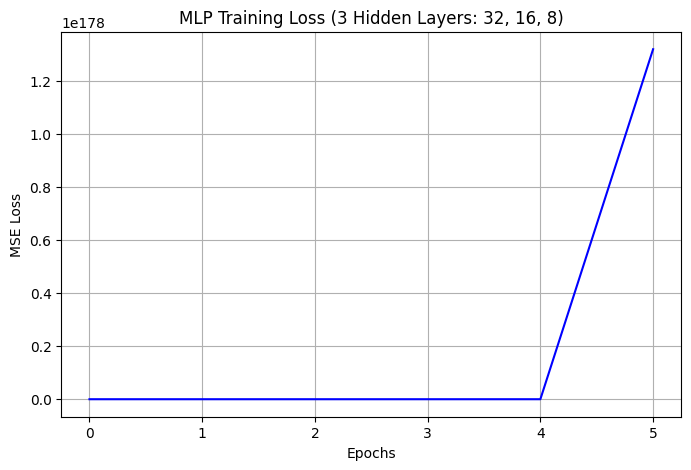

In [76]:
# Train MLP with 3 hidden layers [32, 16, 8]
mlp = MLPRegression(
    input_size=X.shape[1],
    hidden_sizes=[32, 16, 8],  # 3 hidden layers
    lr=0.01,
    epochs=3000
)

print("Training MLP with architecture:", [X.shape[1], 32, 16, 8, 1])
mlp.fit(X, y)

# Prediction
y_pred = mlp.predict(X)

mse = np.mean((y - y_pred) ** 2)
print("\nMean Squared Error:", mse)

# Training loss curve
plt.figure(figsize=(8, 5))
plt.plot(mlp.losses, color='blue')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("MLP Training Loss (3 Hidden Layers: 32, 16, 8)")
plt.grid(True)
plt.show()


## Multiple Layer Neural Network (Sigmoid)

In [81]:
#activation function
def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_derivative(a):
    # a is the output of sigmoid (already computed)
    return a * (1 - a)

# Use relu name for compatibility with existing code
activation = sigmoid
activation_derivative = lambda z: sigmoid_derivative(sigmoid(z))

In [82]:
# Multi-Layer Perceptron with 3 Hidden Layers (Sigmoid)
class MLPRegression:
    def __init__(self, input_size, hidden_sizes, lr=0.01, epochs=3000):
        self.lr = lr
        self.epochs = epochs
        
        # Initialize weights and biases for all layers
        # Architecture: input -> hidden1 -> hidden2 -> hidden3 -> output
        self.W1 = np.random.randn(input_size, hidden_sizes[0])
        self.b1 = np.zeros((1, hidden_sizes[0]))
        
        self.W2 = np.random.randn(hidden_sizes[0], hidden_sizes[1])
        self.b2 = np.zeros((1, hidden_sizes[1]))
        
        self.W3 = np.random.randn(hidden_sizes[1], hidden_sizes[2])
        self.b3 = np.zeros((1, hidden_sizes[2]))
        
        self.W4 = np.random.randn(hidden_sizes[2], 1)
        self.b4 = np.zeros((1, 1))
        
        self.losses = []

    def fit(self, X, y):
        for epoch in range(self.epochs):
            # Forward pass
            # Layer 1
            z1 = np.dot(X, self.W1) + self.b1
            a1 = activation(z1)
            
            # Layer 2
            z2 = np.dot(a1, self.W2) + self.b2
            a2 = activation(z2)
            
            # Layer 3
            z3 = np.dot(a2, self.W3) + self.b3
            a3 = activation(z3)
            
            # Output layer (linear - no activation)
            y_pred = np.dot(a3, self.W4) + self.b4

            # Loss
            loss = np.mean((y - y_pred) ** 2)
            self.losses.append(loss)

            # Backpropagation
            m = len(y)
            d_output = -2 * (y - y_pred) / m
            
            # Output layer gradients
            dW4 = np.dot(a3.T, d_output)
            db4 = np.sum(d_output, axis=0, keepdims=True)
            
            # Hidden layer 3 gradients (use activation a3 for derivative)
            da3 = np.dot(d_output, self.W4.T)
            dz3 = da3 * activation_derivative(a3)
            dW3 = np.dot(a2.T, dz3)
            db3 = np.sum(dz3, axis=0, keepdims=True)
            
            # Hidden layer 2 gradients (use activation a2 for derivative)
            da2 = np.dot(dz3, self.W3.T)
            dz2 = da2 * activation_derivative(a2)
            dW2 = np.dot(a1.T, dz2)
            db2 = np.sum(dz2, axis=0, keepdims=True)
            
            # Hidden layer 1 gradients (use activation a1 for derivative)
            da1 = np.dot(dz2, self.W2.T)
            dz1 = da1 * activation_derivative(a1)
            dW1 = np.dot(X.T, dz1)
            db1 = np.sum(dz1, axis=0, keepdims=True)

            # Update weights
            self.W4 -= self.lr * dW4
            self.b4 -= self.lr * db4
            self.W3 -= self.lr * dW3
            self.b3 -= self.lr * db3
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1
            
            if (epoch + 1) % 500 == 0:
                print(f"Epoch {epoch + 1}/{self.epochs}, Loss: {loss:.6f}")

    def predict(self, X):
        z1 = np.dot(X, self.W1) + self.b1
        a1 = activation(z1)
        z2 = np.dot(a1, self.W2) + self.b2
        a2 = activation(z2)
        z3 = np.dot(a2, self.W3) + self.b3
        a3 = activation(z3)
        return np.dot(a3, self.W4) + self.b4


Training MLP with architecture: [2, 32, 16, 8, 1]
Epoch 500/3000, Loss: 0.149486
Epoch 1000/3000, Loss: 0.154146
Epoch 1500/3000, Loss: 0.157813
Epoch 2000/3000, Loss: 0.156241
Epoch 2500/3000, Loss: 0.150283
Epoch 3000/3000, Loss: 0.141850

Mean Squared Error: 0.14183136860092024


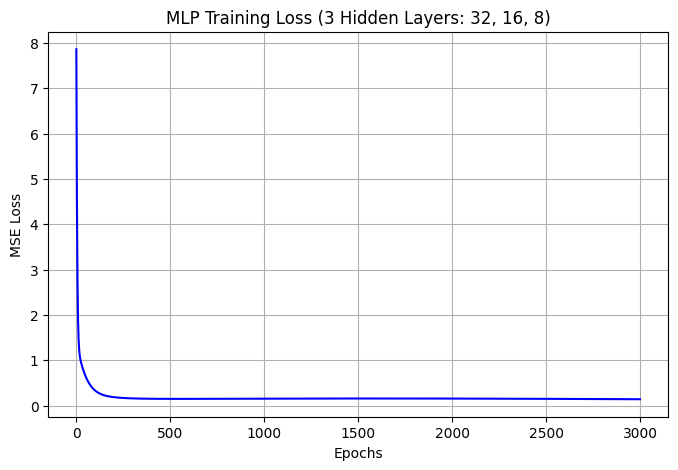

In [83]:
# Train MLP with 3 hidden layers [32, 16, 8]
mlp = MLPRegression(
    input_size=X.shape[1],
    hidden_sizes=[32, 16, 8],  # 3 hidden layers
    lr=0.01,
    epochs=3000
)

print("Training MLP with architecture:", [X.shape[1], 32, 16, 8, 1])
mlp.fit(X, y)

# Prediction
y_pred = mlp.predict(X)

mse = np.mean((y - y_pred) ** 2)
print("\nMean Squared Error:", mse)

# Training loss curve
plt.figure(figsize=(8, 5))
plt.plot(mlp.losses, color='blue')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("MLP Training Loss (3 Hidden Layers: 32, 16, 8)")
plt.grid(True)
plt.show()


## Multiple Layer Neural Network (Tanh)

In [84]:
#activation function
def tanh(z):
    return np.tanh(z)

def tanh_derivative(a):
    # a is the output of tanh (already computed)
    return 1 - a**2

# Use activation name for compatibility with existing code
activation = tanh
activation_derivative = lambda z: tanh_derivative(tanh(z))

In [85]:
# Multi-Layer Perceptron with 3 Hidden Layers (Tanh)
class MLPRegression:
    def __init__(self, input_size, hidden_sizes, lr=0.01, epochs=3000):
        self.lr = lr
        self.epochs = epochs
        
        # Initialize weights and biases for all layers
        # Architecture: input -> hidden1 -> hidden2 -> hidden3 -> output
        self.W1 = np.random.randn(input_size, hidden_sizes[0]) * 0.5
        self.b1 = np.zeros((1, hidden_sizes[0]))
        
        self.W2 = np.random.randn(hidden_sizes[0], hidden_sizes[1]) * 0.5
        self.b2 = np.zeros((1, hidden_sizes[1]))
        
        self.W3 = np.random.randn(hidden_sizes[1], hidden_sizes[2]) * 0.5
        self.b3 = np.zeros((1, hidden_sizes[2]))
        
        self.W4 = np.random.randn(hidden_sizes[2], 1) * 0.5
        self.b4 = np.zeros((1, 1))
        
        self.losses = []

    def fit(self, X, y):
        for epoch in range(self.epochs):
            # Forward pass
            # Layer 1
            z1 = np.dot(X, self.W1) + self.b1
            a1 = activation(z1)
            
            # Layer 2
            z2 = np.dot(a1, self.W2) + self.b2
            a2 = activation(z2)
            
            # Layer 3
            z3 = np.dot(a2, self.W3) + self.b3
            a3 = activation(z3)
            
            # Output layer (linear - no activation)
            y_pred = np.dot(a3, self.W4) + self.b4

            # Loss
            loss = np.mean((y - y_pred) ** 2)
            self.losses.append(loss)

            # Backpropagation
            m = len(y)
            d_output = -2 * (y - y_pred) / m
            
            # Output layer gradients
            dW4 = np.dot(a3.T, d_output)
            db4 = np.sum(d_output, axis=0, keepdims=True)
            
            # Hidden layer 3 gradients (use activation a3 for derivative)
            da3 = np.dot(d_output, self.W4.T)
            dz3 = da3 * activation_derivative(a3)
            dW3 = np.dot(a2.T, dz3)
            db3 = np.sum(dz3, axis=0, keepdims=True)
            
            # Hidden layer 2 gradients (use activation a2 for derivative)
            da2 = np.dot(dz3, self.W3.T)
            dz2 = da2 * activation_derivative(a2)
            dW2 = np.dot(a1.T, dz2)
            db2 = np.sum(dz2, axis=0, keepdims=True)
            
            # Hidden layer 1 gradients (use activation a1 for derivative)
            da1 = np.dot(dz2, self.W2.T)
            dz1 = da1 * activation_derivative(a1)
            dW1 = np.dot(X.T, dz1)
            db1 = np.sum(dz1, axis=0, keepdims=True)

            # Update weights
            self.W4 -= self.lr * dW4
            self.b4 -= self.lr * db4
            self.W3 -= self.lr * dW3
            self.b3 -= self.lr * db3
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1
            
            if (epoch + 1) % 500 == 0:
                print(f"Epoch {epoch + 1}/{self.epochs}, Loss: {loss:.6f}")

    def predict(self, X):
        z1 = np.dot(X, self.W1) + self.b1
        a1 = activation(z1)
        z2 = np.dot(a1, self.W2) + self.b2
        a2 = activation(z2)
        z3 = np.dot(a2, self.W3) + self.b3
        a3 = activation(z3)
        return np.dot(a3, self.W4) + self.b4


Training MLP with architecture: [2, 32, 16, 8, 1]
Epoch 500/3000, Loss: 0.009812
Epoch 1000/3000, Loss: 0.005997
Epoch 1500/3000, Loss: 0.004282
Epoch 2000/3000, Loss: 0.003097
Epoch 2500/3000, Loss: 0.002517
Epoch 3000/3000, Loss: 0.002201

Mean Squared Error: 0.002200344518506896


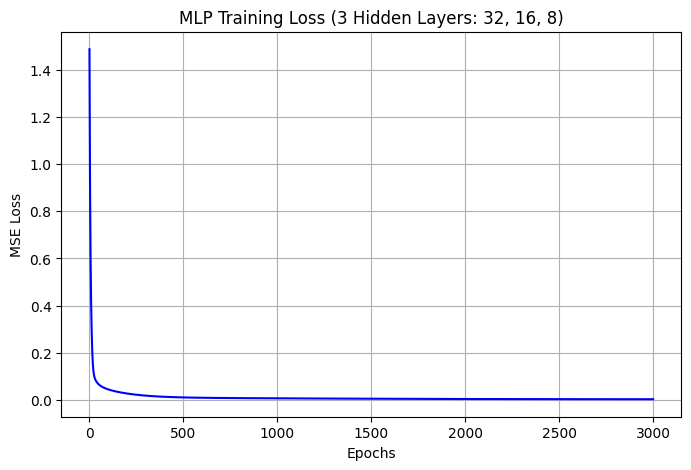

In [86]:
# Train MLP with 3 hidden layers [32, 16, 8]
mlp = MLPRegression(
    input_size=X.shape[1],
    hidden_sizes=[32, 16, 8],  # 3 hidden layers
    lr=0.01,
    epochs=3000
)

print("Training MLP with architecture:", [X.shape[1], 32, 16, 8, 1])
mlp.fit(X, y)

# Prediction
y_pred = mlp.predict(X)

mse = np.mean((y - y_pred) ** 2)
print("\nMean Squared Error:", mse)

# Training loss curve
plt.figure(figsize=(8, 5))
plt.plot(mlp.losses, color='blue')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("MLP Training Loss (3 Hidden Layers: 32, 16, 8)")
plt.grid(True)
plt.show()


## Multiple Layer Neural Network (Different Activations)

In [88]:
#activation function
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_derivative(a):
    # a is the output of sigmoid (already computed)
    return a * (1 - a)

def tanh(z):
    return np.tanh(z)

def tanh_derivative(a):
    # a is the output of tanh (already computed)
    return 1 - a**2

In [89]:
# Multi-Layer Perceptron with 3 Hidden Layers (Tanh)
class MLPRegression:
    def __init__(self, input_size, hidden_sizes, lr=0.01, epochs=3000):
        self.lr = lr
        self.epochs = epochs
        
        # Initialize weights and biases for all layers
        # Architecture: input -> hidden1 -> hidden2 -> hidden3 -> output
        self.W1 = np.random.randn(input_size, hidden_sizes[0]) * 0.5
        self.b1 = np.zeros((1, hidden_sizes[0]))
        
        self.W2 = np.random.randn(hidden_sizes[0], hidden_sizes[1]) * 0.5
        self.b2 = np.zeros((1, hidden_sizes[1]))
        
        self.W3 = np.random.randn(hidden_sizes[1], hidden_sizes[2]) * 0.5
        self.b3 = np.zeros((1, hidden_sizes[2]))
        
        self.W4 = np.random.randn(hidden_sizes[2], 1) * 0.5
        self.b4 = np.zeros((1, 1))
        
        self.losses = []

    def fit(self, X, y):
        for epoch in range(self.epochs):
            # Forward pass
            # Layer 1
            z1 = np.dot(X, self.W1) + self.b1
            a1 = relu(z1)
            
            # Layer 2
            z2 = np.dot(a1, self.W2) + self.b2
            a2 = sigmoid(z2)
            
            # Layer 3
            z3 = np.dot(a2, self.W3) + self.b3
            a3 = tanh(z3)
            
            # Output layer (linear - no activation)
            y_pred = np.dot(a3, self.W4) + self.b4

            # Loss
            loss = np.mean((y - y_pred) ** 2)
            self.losses.append(loss)

            # Backpropagation
            m = len(y)
            d_output = -2 * (y - y_pred) / m
            
            # Output layer gradients
            dW4 = np.dot(a3.T, d_output)
            db4 = np.sum(d_output, axis=0, keepdims=True)
            
            # Hidden layer 3 gradients (use activation a3 for derivative)
            da3 = np.dot(d_output, self.W4.T)
            dz3 = da3 * tanh_derivative(a3)
            dW3 = np.dot(a2.T, dz3)
            db3 = np.sum(dz3, axis=0, keepdims=True)
            
            # Hidden layer 2 gradients (use activation a2 for derivative)
            da2 = np.dot(dz3, self.W3.T)
            dz2 = da2 * sigmoid_derivative(a2)
            dW2 = np.dot(a1.T, dz2)
            db2 = np.sum(dz2, axis=0, keepdims=True)
            
            # Hidden layer 1 gradients (use activation a1 for derivative)
            da1 = np.dot(dz2, self.W2.T)
            dz1 = da1 * relu_derivative(a1)
            dW1 = np.dot(X.T, dz1)
            db1 = np.sum(dz1, axis=0, keepdims=True)

            # Update weights
            self.W4 -= self.lr * dW4
            self.b4 -= self.lr * db4
            self.W3 -= self.lr * dW3
            self.b3 -= self.lr * db3
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1
            
            if (epoch + 1) % 500 == 0:
                print(f"Epoch {epoch + 1}/{self.epochs}, Loss: {loss:.6f}")

    def predict(self, X):
        z1 = np.dot(X, self.W1) + self.b1
        a1 = relu(z1)
        z2 = np.dot(a1, self.W2) + self.b2
        a2 = sigmoid(z2)
        z3 = np.dot(a2, self.W3) + self.b3
        a3 = tanh(z3)
        return np.dot(a3, self.W4) + self.b4


Training MLP with architecture: [2, 32, 16, 8, 1]
Epoch 500/3000, Loss: 0.025280
Epoch 1000/3000, Loss: 0.004895
Epoch 1500/3000, Loss: 0.002637
Epoch 2000/3000, Loss: 0.001930
Epoch 2500/3000, Loss: 0.001533
Epoch 3000/3000, Loss: 0.001294

Mean Squared Error: 0.0012933727735986817


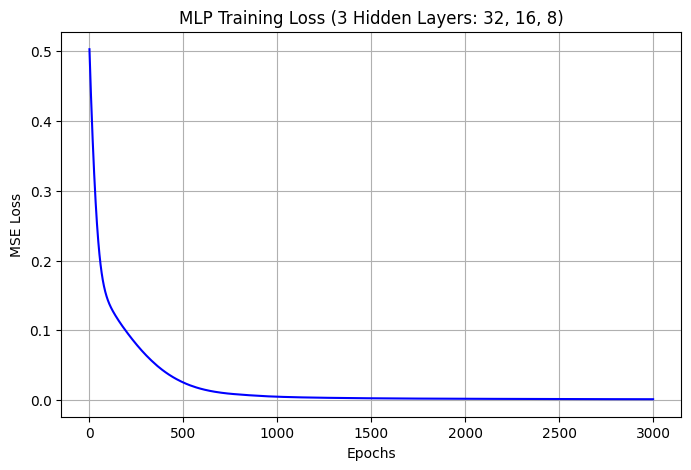

In [90]:
# Train MLP with 3 hidden layers [32, 16, 8]
mlp = MLPRegression(
    input_size=X.shape[1],
    hidden_sizes=[32, 16, 8],  # 3 hidden layers
    lr=0.01,
    epochs=3000
)

print("Training MLP with architecture:", [X.shape[1], 32, 16, 8, 1])
mlp.fit(X, y)

# Prediction
y_pred = mlp.predict(X)

mse = np.mean((y - y_pred) ** 2)
print("\nMean Squared Error:", mse)

# Training loss curve
plt.figure(figsize=(8, 5))
plt.plot(mlp.losses, color='blue')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("MLP Training Loss (3 Hidden Layers: 32, 16, 8)")
plt.grid(True)
plt.show()
